# Round 3. Implementing the Barabási-Albert model
The Barabási-Albert scale-free network model is a model of network growth, where new nodes continuously enter the network and make links to existing nodes with a probability that is linearly proportional to their degree. The steps required for generating a Barabási-Albert scale-free network with $N$ nodes are as follows:

- Create a small seed network which has at least $m$ nodes, where $m$ is the number of links a new node creates to already existing nodes.  In this exercise, *use a 4-clique as the seed network*.
- Add new nodes to the network until your network has $N$ nodes, such that each entering node has $m$ links and connects to existing nodes proportional to their degrees.

In this exercise, we will implement the model and investigate the networks it generates. **This notebook covers most of the plotting and binning required in this exercise, which lets you focus practically only on the actual implementation of the model.** Using this notebook is **optional**. With it, you only need to fill in the required functions. Some of the functions do NOT need modifications. You may start your solution after the subtitle "**Beginning of the Exercise**" down below. 

In addition to returning a short report of your results (including the visualizations), return also your commented Python code or notebook. Remember to label the axes in your figures!

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import binned_statistic

In [2]:
def log_bins(max_degree):
    # have the number of logbins such that there are 10 bins per decade

    num_logbins = int(np.log10(1.5 * max_degree) - np.log10(1.5)) * 10

    # generate log bins from k=1.5 to k=1.5*max(degree)
    bins = np.logspace(
        np.log10(1.5), np.log10(1.5 * max_degree), num_logbins)

    return bins

# Beginning of the exercise

### a. BA network implementation
- Implement a Python function for generating Barabási-Albert networks. 
- Then generate a network with ($N=250$) and ($m=2$) (starting from a 4-clique seed network).
- Write down the degree of the node with the highest degree in your generated network.
- Write down the total number of links in your generated network.
- Visualize the network with networkx using the spring layout i.e.`nx.draw_spring(G)`. You should be able to spot some nodes that have many connections, while most of the nodes have few connections.

**Hints**: 
- In general, the seed network can be anything, *e.g.* a clique of size $m+1$, as long as it has enough nodes for the first incoming node to attach to with $m$ links. In this exercise, *use a 4-clique*.
- The easiest way of picking nodes with probability proportional to their degree is to use the `p` keyword in function `np.random.choice` to assign probability of selection to each element and the `size` keyword to indicate how many nodes to sample. Remember to set the `replace` keyword to `False` to make sure you don't get any node more than once.

In [3]:
def ba_network(N, m, seed_net_size=4):
    # Generate initial small seed network (clique of seedsize nodes)
    network = nx.complete_graph(seed_net_size)

    # TODO: Grow the network here
    # YOUR CODE HERE
    for i in range(seed_net_size, seed_net_size+N):
        # add new node to network
        network.add_node(i)
        
        # get list of number of neighbors for each node
        num_neighbors = [len(network[node]) for node in range(i)]
        # get total neighbors sum
        sum_neighbors = np.sum(num_neighbors)
        # obtain probability of choosing each node as neighbor for new node
        probabilities = num_neighbors/sum_neighbors
        
        # choose m random neighbors based on probability
        new_neighbors = np.random.choice(range(i), size=m, p=probabilities, replace=False)
        
        # create new edge for each new neighbor
        edges = [(i,n) for n in new_neighbors]
        # add edges to network
        network.add_edges_from(edges)
        
    return network

The maximum degree is:  35
The total number of edges is:  506


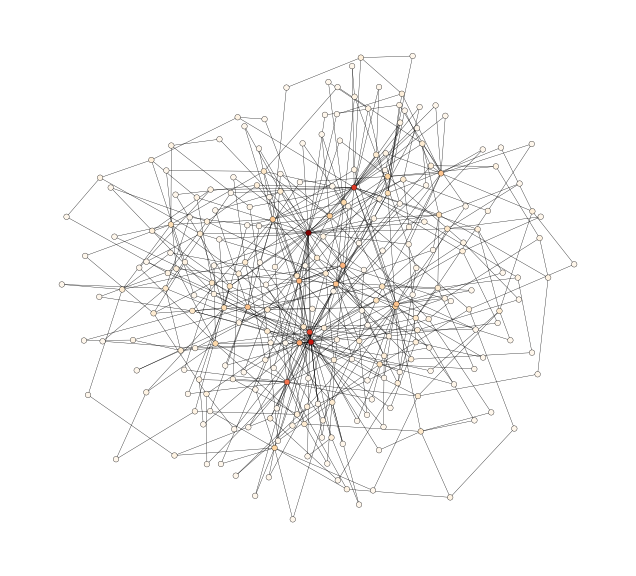

In [4]:
np.random.seed(28)

fig = plt.figure(figsize=(10, 10), dpi=80)
ax = fig.add_subplot(111)

net = ba_network(N=250, m=2, seed_net_size=4)
nodes = net.nodes()
degrees_dict = nx.degree(net)
degrees = [degrees_dict[node] for node in nodes]

print("The maximum degree is: ", max(degrees))
print("The total number of edges is: ", len(net.edges()))

nx.draw_spring(
    net, node_size=25, node_color=degrees, cmap='OrRd',
    vmin=np.min(degrees), vmax=np.max(degrees), width=0.3, linewidths=0.3, edgecolors='black')
ax.set_aspect('equal')

figure_filename = 'BA_visualized.pdf'

plt.show()


### b. BA network degree probability distribution
- Generate a new network using parameters $N=10^4$ with $m=4$ and plot the logarithmically binned probability density function for degree, $P(k)$ (on double logarithmic axes, `ax.loglog`)
- Compare your result with the theoretical prediction of $P(k)=2m\left(m+1\right)/\left[k\left(k+1\right)\left(k+2\right)\right]$ (proved in the next pen-and-paper exercise). To do this, plot both the experimental and theoretical distributions on the same axes.

**Hints**:
- Generating the results should take less than a minute (this is not a requirement for grading, just a note to let you know what to expect). If your code is taking too long to run, there are probably ways to improve its efficiency. Try to be efficient when picking nodes as link targets.
- The code for plotting the binned degree PDF with logarithmic bins is provided in this notebook. If you wish to do the binning and plotting yourself, or are simply interested in how it's properly done, have a look at the materials in the **binning tutorial** in MyCourses. Some considerations for those further interested:
- There is no simple rule of thumb for selecting the number of bins. However, ideally there should be no empty bins, but on the other hand one would like to have as many bins as possible to best present the shape of the true distribution.
- When plotting the degree PDF, you may end up with empty bins for small values of $k$. (Consider e.g. if you had a bin $[3.1, 3.9]$: this bin would always have value zero.) To circumvent this, it is often practical to bin degree distributions using  ''lin-log'' bins: $[0.5, 1.5, 2.5, \ldots, 9.5, 10.5, 12.5, 16.5, \ldots ]$ so that one does not end up with empty bins for small values of $k$. **If you wish**, you may use this more sophisticated approach of ''lin-log'' bins for plotting the binned degree PDF.

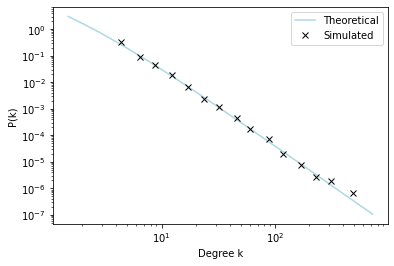

In [6]:
np.random.seed(42)

net = ba_network(N=10000, m=4, seed_net_size=4)
degrees = [deg for _, deg in nx.degree(net)]
# if you are using an older version of networkx where the return value of nx.degree is a dict instead of
# a DegreeView, you will get a type error from the above line. To fix, change it to:
# degrees = list(nx.degree(net).values())

fig = plt.figure(figsize=(10, 10), dpi=80)
ax = fig.add_subplot(111)

# so use np.histogram to get histogram and bin edges
bins = log_bins(max(degrees))
pk, bin_edges = np.histogram(degrees, bins=bins, density=True)

bincenters, _, _ = binned_statistic( degrees, degrees, statistic='mean', bins=bins)
# TODO: Label axes
# YOUR CODE HERE
ax.set_xlabel('Degree k')
ax.set_ylabel('P(k)')

ax.loglog(bins, 2 * 4 * (4 + 1) /
            (bins * (bins + 1) * (bins + 2)),
            label='Theoretical', color='lightblue')
ax.loglog(bincenters, pk, 'kx', label='Simulated')

ax.legend()

figure_filename = 'BA_degree_distribution.pdf'

plt.show()